# Ecuación de Schrödinger: Estados Ligados

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline


## Ecuación de Schrödinger: 

## \begin{eqnarray} -\frac{1}{2}\frac{\partial^2 \varphi(x)}{\partial x} + V(x) \, \varphi(x) &=&  E \, \varphi(x) \nonumber \\ \frac{\partial^2 \varphi(x)}{\partial x^2} - 2\left[V(x) -E \right] \, \varphi(x) &=& 0 \nonumber  \\  \end{eqnarray}

## Solución de la Ecuación  

## $$
\begin{eqnarray} 
\varphi_{i+1} = ( \, 2 \Delta x^2 (V(x) - E) + 2 \, ) \varphi_{i} - \varphi_{i-1}
\end{eqnarray} 
$$

In [2]:
# Definición del Potencial

def Vpot(x):
    return ( -1.0/x)


In [3]:
# Solución Saliente

def outsch(y,y0,y1,x, E):
    y[0]= y0
    y[1]= y1
    npts = len(x)
    for i in range(1,npts-1):
        dx = x[i]-x[i-1]
        dx2 = dx**2
        y[i+1] = (2.0*dx2*(Vpot(x[i])-E) + 2.0 )*y[i] - y[i-1]

 
# Método de Numerov, alternativo si se quiere mayor orden
# Hay que acomodar los índices para que no vaya por V(x[0])
        
#        k2 = 2.0*(E - Vpot(x[i]) )
#        rnumerov = 1.0/12.0 * k2 * dx2
#        rnum1 = 2.0*(1.0 - 5.0*rnumerov )*y[i]
        
#        k2 = 2.0*(E - Vpot(x[i-1]) )
#        rnumerov = 1.0/12.0 * k2 * dx2
#        rnum2 = (1.0 + rnumerov)*y[i-1]
#        rnum = rnum1-rnum2
        
#        k2 = 2.0*(E - Vpot(x[i+1]) )
#        rnumerov = 1.0/12.0 * k2 * dx2
#        rden = 1.0 + rnumerov
        
#        y[i+1] = rnum/rden
        
    return y

In [4]:
# Solución Entrante

def intsch(y,yN,yN1,x, E):
    npts = len(x)
    y[0]=0.0
    y[npts-1]= yN
    y[npts-2]= yN1
    for i in range(npts-3,0,-1):
        dx = x[i]-x[i-1]
        dx2 = dx**2
        y[i] = (2.0*dx2*(Vpot(x[i+1])-E) + 2.0 )*y[i+1] - y[i+2]
        
    return y

In [5]:
# Punto de Matcheo

def xmatch(Vpot):
    for i in range(npts-1,1,-1):
        if (Vpot(x[i])<=E):
            xmatch = x[i]
            break
    return i


In [6]:
# Diferencia de derivadas en Xm

def diffderiv(yout,yint,ixm,dx):
    derint = (yint[ixm+1]-yint[ixm-1])/(2.0*dx)
    derout = (yout[ixm+1]-yout[ixm-1])/(2.0*dx)
    
    return  derout-derint

In [7]:
#  Algoritmo para corregir la energía según la diferencia de derivadas
#  Ver libro de Walter Johnson

def newE(Eold,yout,yint,difder,ixm,x):
    npts = len(x)
    dx = x[1]-x[0]
    P1 = yout[ixm]
    
    sum = 0.0
    for i in range(ixm):
        sum = sum + (yout[i]**2)
    for i in range(ixm,npts):
        sum = sum + (yint[i]**2)
    sum = sum*dx
    
    dE = difder*P1 / (2*sum)
        
    return dE

In [8]:
# Vector para guardar energías parciales

Et = []

In [9]:
# Definición de Vectores

xmax = 10.0
xmin = 0.0
npts = 500
dx = (xmax-xmin)/npts

x = np.linspace(xmin,xmax,npts)
yout = np.linspace(xmin,xmax,npts)
yint = np.linspace(xmin,xmax,npts)
ui = np.zeros(npts)
uo = np.zeros(npts)


0   Diff Deriv=: 0.432359479411
1   Diff Deriv=: -0.124718315956
2   Diff Deriv=: -0.0282359459849
3   Diff Deriv=: -0.000885884278828
4   Diff Deriv=: 9.34839021471e-07
5   Diff Deriv=: -1.87432985799e-09
6   Diff Deriv=: 3.7331249203e-12
7   Diff Deriv=: 2.91433543964e-14


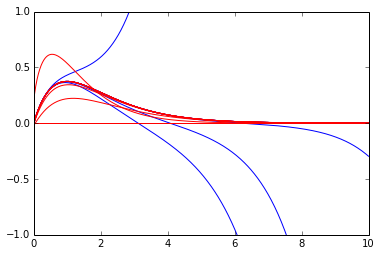

[-0.8,
 -0.43649464255345782,
 -0.48501223527948328,
 -0.49947501201958161,
 -0.49994957191102157,
 -0.49994907093356666,
 -0.49994907193801408,
 -0.49994907193601351]

In [10]:
# Valores iniciales de phi(x0) y phi(x1)
y0=0.0
y1=dx
yN = 0.0

# Valor inicial de E
E = -0.8
Et.append(E)

# Iteraciones para mejorar la energía
eps = 10**(-12)

for i in range(20):

    k = np.sqrt(-2.0*E)
    yN1 = (np.exp(k*dx)-1)/100

# Definición de punto de matcheo
    ixm = xmatch(Vpot)

    outsch(yout,y0,y1,x,E);
    intsch(yint,yN,yN1,x,E);

    # Scale incoming solution to match at xm
    rfact = yout[ixm]/yint[ixm]
    yint = yint*rfact
    
    uo = np.c_[uo,yout]
    ui = np.c_[ui,yint]

    difder = diffderiv(yout,yint,ixm,dx)
    print i,'  Diff Deriv=:',difder
    
    if (np.abs(difder) <= eps):
        break
    
    dE = newE(E,yout,yint,difder,ixm,x)
    E = E + dE
    Et.append(E)

# Ploteo de solución
plt.plot(x, uo, color='b')
plt.plot(x, ui, color='r')
plt.axis([xmin,xmax,-1,1])
#plt.plot(x,Vpot(x),color='k')
plt.show()

Et

In [15]:
# Normalización de las funciones 

def Normalizate(y,x):
    dx = x[1]-x[0] # assume uniformly spaced points
    npts = len(x)
    
    suma = 0.0
    for i in range(1,npts):
        suma = suma + y[i]**2
    
    suma = suma*dx 
    rnorm = 1.0/np.sqrt(suma)
 
#       Normalization
    rsign = 1.0
    if y[1] < 0:
        rsign = -1.0
        rnorm = rnorm * rsign
        
    for i in range(1,npts):
        y[i] = y[i]*rnorm
        
    return  y

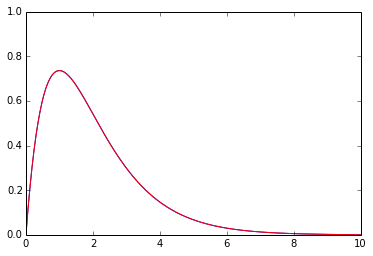

In [16]:
# Ploteo de solución (sòlo último paso)

yout = Normalizate(yout,x)
yint = Normalizate(yint,x)

plt.plot(x, yout, color='b')
plt.plot(x, yint, color='r')
plt.axis([xmin,xmax,0,1])
#plt.plot(x,Vpot(x),color='k')
plt.show()
